In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ftplib
import io
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
ftp = ftplib.FTP("ftp.nodc.noaa.gov")
ftp.login()

'230 Login successful.'

In [83]:
ftp.cwd("nodc/archive/arc0135/0187718/2.2/data/0-data/")
ftp.nlst()
download_file = io.BytesIO()
ftp.retrbinary('RETR lake_erie_habs_field_sampling_results_2012_2018_v2.csv', download_file.write)
download_file.seek(0)
data = pd.read_csv(download_file, engine='python', encoding = "ISO-8859-1")
ftp.quit()

'221 Goodbye.'

In [84]:
import geopandas as gpd

In [85]:
cd "C:\Users\jchen148.UR\Documents\Bay Project\Data\WBD_National_GDB\"

C:\Users\jchen148.UR\Documents\Bay Project\Data\WBD_National_GDB


In [6]:
huc_4 = gpd.read_file("WBD_National_GDB.gdb", driver='FileGDB', layer='WBDHU4')

In [86]:
huc_12 = gpd.read_file("WBD_National_GDB.gdb", driver='FileGDB', layer='WBDHU12')

In [87]:
huc_12

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,noncontributingareaacres,noncontributingareasqkm,areasqkm,areaacres,...,name,states,huc12,hutype,humod,tohuc,globalid,shape_Length,shape_Area,geometry
0,{AAF0D733-828B-4B8E-9E52-388A49AC0A23},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:31,0.0,0.0,53.46,13211.47,...,Judicial Ditch Number Thirteen,"IA,MN",070200090402,S,NM,070200090403,{991AACA7-E29C-11E2-8094-0021280458E6},0.637165,0.005951,"MULTIPOLYGON (((-94.01060 43.56298, -94.01046 ..."
1,{FEEC96BB-D4C0-468F-A345-6996A458D7A7},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42,0.0,0.0,42.55,10514.34,...,West Branch Lac qui Parle River,MN,070200030503,S,NM,070200030705,{A220BE40-E29C-11E2-8094-0021280458E6},0.456829,0.004851,"MULTIPOLYGON (((-96.13949 44.97296, -96.13908 ..."
2,{5954C8E6-710A-4F46-9409-C39F7A4E8031},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42,0.0,0.0,62.97,15561.22,...,County Ditch Number Thirtyfour,MN,070200030602,S,NM,070200030603,{A220F315-E29C-11E2-8094-0021280458E6},0.701524,0.007178,"MULTIPOLYGON (((-95.91504 44.97483, -95.91437 ..."
3,{DF84FD2E-015D-4B39-9409-68BAF583D58C},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42,0.0,0.0,82.87,20477.59,...,County Ditch Number Twentynine A,MN,070200030701,S,NM,070200030702,{A22127F8-E29C-11E2-8094-0021280458E6},0.747552,0.009439,"MULTIPOLYGON (((-96.27678 44.93935, -96.27532 ..."
4,{D64CC50D-33CD-43A1-8FED-A43524B2A383},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42,0.0,0.0,101.75,25142.88,...,County Ditch Number Seventynine-Lac qui Parle ...,MN,070200030702,S,NM,070200030705,{A22146C3-E29C-11E2-8094-0021280458E6},0.790646,0.011584,"MULTIPOLYGON (((-96.02941 44.92618, -96.02912 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102903,{0E0F3DE6-1419-4E79-96B1-2BD90CFA5036},,None,None,None,2020-08-19T07:45:29,0.0,0.0,128.77,31819.10,...,Outlet Avingak Creek,AK,190601020508,S,NM,190601020603,{838E3030-A93A-437D-8AD7-26373571D284},1.622485,0.029380,"MULTIPOLYGON (((-160.90508 69.44679, -160.9048..."
102904,{CB049C8F-AD12-41D1-A988-6F7376E740A2},,None,None,None,2020-08-19T07:45:29,0.0,0.0,88.60,21893.04,...,Headwaters Avingak Creek,AK,190601020502,S,NM,190601020508,{B1257916-79C1-4553-908D-25125D34E79A},1.069471,0.020262,"MULTIPOLYGON (((-160.68312 69.48122, -160.6824..."
102905,{0FC28768-98FF-4BB3-9A59-4BB38BD3CF02},,None,None,None,2020-08-19T07:45:29,0.0,0.0,70.06,17312.40,...,190601020601,AK,190601020601,S,NM,190601020602,{D3CE71BB-BA79-475F-A05B-E8050FD9C8C8},0.791424,0.015990,"MULTIPOLYGON (((-161.55166 69.46070, -161.5507..."
102906,{35E8E9DA-A9F9-4FE8-9D39-6BAF2F2FD363},,None,None,None,2020-08-19T07:45:29,0.0,0.0,121.20,29949.22,...,190601020602,AK,190601020602,S,NM,190601020603,{03E95867-BB21-4258-AE0D-B8B04F01375A},1.407443,0.027690,"MULTIPOLYGON (((-161.38859 69.49604, -161.3882..."


In [88]:
import pandas as pd
import fiona
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from pyproj import Proj
import geoplot as gplt
import geoplot.crs as gcrs

In [89]:
# converting to lat long
huc_12.crs = {'init' :'epsg:2283'}

specify states

In [90]:
bay_states = ['NY', 'PA', 'VA', 'MD', 'WV', 'DE', 'DC']

In [91]:
for i in bay_states:
    print(i)

NY
PA
VA
MD
WV
DE
DC


In [92]:
huc_12['states']

0         IA,MN
1            MN
2            MN
3            MN
4            MN
          ...  
102903       AK
102904       AK
102905       AK
102906       AK
102907       AK
Name: states, Length: 102908, dtype: object

In [93]:
keep = []
for i in bay_states:
    for x in huc_12['states'].unique():
        if str(x) in i:
            keep.append(x)
print(keep)

['NY', 'PA', 'VA', 'MD', 'WV', 'DE']


In [94]:
keephuc = huc_12[huc_12['states'].isin(keep)]

In [95]:
keephuc.shape

(4663, 21)

In [96]:
keephuc['states'].unique()

array(['WV', 'VA', 'DE', 'MD', 'PA', 'NY'], dtype=object)

In [97]:
keephuc.head(2)

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,noncontributingareaacres,noncontributingareasqkm,areasqkm,areaacres,...,name,states,huc12,hutype,humod,tohuc,globalid,shape_Length,shape_Area,geometry
232,{BC75B77F-95EE-45C0-91E9-D373EA3D6BAD},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017-05-25T13:11:27,0.0,0.0,103.96,25688.66,...,Headwaters Elkhorn Creek,WV,050702010202,S,NM,050702010203,{AAFE631D-E29C-11E2-8094-0021280458E6},0.534342,0.010579,"MULTIPOLYGON (((-81.39507 37.46196, -81.39492 ..."
236,{0432273F-E9E0-4FC4-80AA-9ADDB0A272EC},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017-05-25T13:11:27,0.0,0.0,106.99,26436.85,...,East Wilderness Creek-Kimberling Creek,VA,050500020103,S,NM,050500020105,{B33FB818-E29C-11E2-8094-0021280458E6},0.532044,0.010856,"MULTIPOLYGON (((-81.03335 37.23799, -81.03275 ..."


Read in County

In [98]:
cd "C:\Users\jchen148.UR\Documents\Bay Project\Data\tl_2017_us_county"

C:\Users\jchen148.UR\Documents\Bay Project\Data\tl_2017_us_county


In [99]:
# read in county boundaries
counties = gpd.read_file('tl_2017_us_county.shp')

Ciation: https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_fips_master.csv

In [100]:
state_county_fips = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv")

In [101]:
state_county_fips.head()

,fips,name,state
0,0,UNITED STATES,NaN
1,1000,ALABAMA,NaN
2,1001,Autauga County,AL
3,1003,Baldwin County,AL
4,1005,Barbour County,AL


In [181]:
keep_counties = state_county_fips[state_county_fips['state'].isin(bay_states)]

In [182]:
keep_counties

,fips,name,state
325,10001,Kent County,DE
326,10003,New Castle County,DE
327,10005,Sussex County,DE
329,11001,District of Columbia,DC
1215,24001,Allegany County,MD
...,...,...,...
3093,54101,Webster County,WV
3094,54103,Wetzel County,WV
3095,54105,Wirt County,WV
3096,54107,Wood County,WV


In [183]:
keep_counties.shape

(346, 3)

In [30]:
# read in water temperature data

In [105]:
cd "E:\Hackathon_HackTheBay\Water Quality Data"

E:\Hackathon_HackTheBay\Water Quality Data


In [106]:
Water_temp = pd.read_excel("Water_Temp.xlsx")

In [107]:
Water_temp.head()

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,264272,29,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY509,CBP,7/22/2009,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
1,264279,50,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY531,CBP,6/22/2010,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2,264286,70,MDDNR,NaN,Clear (0-10%),NaN,BAY532,CBP,7/7/2010,NaN,...,NaN,E,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
3,264298,101,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY492,CBP,11/12/2008,NaN,...,NaN,N,0 To 1 Knot,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
4,264310,131,MDDNR,NaN,Overcast (>90%),NaN,BAY514,CBP,10/15/2009,NaN,...,NaN,SE,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD


In [108]:
Water_temp.Date = pd.to_datetime(Water_temp.Date, dayfirst = True)
Water_temp.set_index("Date", inplace=True)
#df_comp=df_comp.asfreq('b')
#df_comp=df_comp.fillna(method='ffill')

In [109]:
Water_temp.head()

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,FieldActivityRemark,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-22,264272,29,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY509,CBP,NaN,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2010-06-22,264279,50,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY531,CBP,NaN,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2010-07-07,264286,70,MDDNR,NaN,Clear (0-10%),NaN,BAY532,CBP,NaN,NaN,...,NaN,E,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2008-12-11,264298,101,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY492,CBP,NaN,NaN,...,NaN,N,0 To 1 Knot,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2009-10-15,264310,131,MDDNR,NaN,Overcast (>90%),NaN,BAY514,CBP,NaN,NaN,...,NaN,SE,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD


In [111]:
Water_temp['Parameter'].describe()

count     124698
unique         1
top        WTEMP
freq      124698
Name: Parameter, dtype: object

In [112]:
Water_temp.reset_index(inplace=True)

In [113]:
Water_temp.drop_duplicates(subset='Date', inplace=True)

In [114]:
Water_temp.head()

,Date,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,2009-07-22,264272,29,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY509,CBP,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
1,2010-06-22,264279,50,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY531,CBP,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2,2010-07-07,264286,70,MDDNR,NaN,Clear (0-10%),NaN,BAY532,CBP,NaN,...,NaN,E,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
3,2008-12-11,264298,101,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY492,CBP,NaN,...,NaN,N,0 To 1 Knot,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
4,2009-10-15,264310,131,MDDNR,NaN,Overcast (>90%),NaN,BAY514,CBP,NaN,...,NaN,SE,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD


In [115]:
# set Date as index
Water_temp.set_index('Date', inplace=True)

In [116]:
# set Date as index
Water_temp.head()

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,FieldActivityRemark,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-22,264272,29,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY509,CBP,NaN,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2010-06-22,264279,50,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY531,CBP,NaN,NaN,...,NaN,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2010-07-07,264286,70,MDDNR,NaN,Clear (0-10%),NaN,BAY532,CBP,NaN,NaN,...,NaN,E,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2008-12-11,264298,101,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY492,CBP,NaN,NaN,...,NaN,N,0 To 1 Knot,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD
2009-10-15,264310,131,MDDNR,NaN,Overcast (>90%),NaN,BAY514,CBP,NaN,NaN,...,NaN,SE,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD


In [45]:
# need Date, Parameter, Point, HUC12_HUCNAME_, FIPS_, COUNTY_, STATE_

In [117]:
Water_temp[['Parameter', 'MeasureValue', 'Point', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_', 'STATE_', 'HUC12']]

,Parameter,MeasureValue,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,HUC12
Date,,,,,,,,,
2009-07-22,WTEMP,29.10,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2010-06-22,WTEMP,32.00,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2010-07-07,WTEMP,33.60,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2008-12-11,WTEMP,13.60,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2009-10-15,WTEMP,15.20,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
...,...,...,...,...,...,...,...,...,...
2007-09-02,WTEMP,1.57,POINT (-76.61165 37.34708),20801070201,Jones Creek-York River,51073,Gloucester County,VA,20801070201
2007-07-09,WTEMP,27.21,POINT (-76.5243 37.24432),20801070203,Carter Creek-York River,51199,York County,VA,20801070203
2007-12-11,WTEMP,13.66,POINT (-76.5243 37.24432),20801070203,Carter Creek-York River,51199,York County,VA,20801070203


In [118]:
# get unique points
water_collections = Water_temp[['Longitude', 'Latitude']].drop_duplicates()
water_collections.shape

(179, 2)

In [119]:
# see Water Temperature in different HUC_12 over time
sub_water_temp = Water_temp[['Parameter', 'MeasureValue', 'Point', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_', 'STATE_', 'HUC12']]

In [120]:
sub_water_temp.head()

,Parameter,MeasureValue,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,HUC12
Date,,,,,,,,,
2009-07-22,WTEMP,29.1,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2010-06-22,WTEMP,32.0,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2010-07-07,WTEMP,33.6,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2008-12-11,WTEMP,13.6,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303
2009-10-15,WTEMP,15.2,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,20403030303


The ACF

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

In [122]:
# resample the time-series as weekly. Cited from Marina
sub_water_temp = sub_water_temp.resample('W').mean().interpolate(method = 'time')

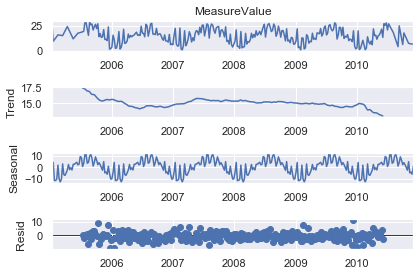

In [123]:
seasonal_decompose(sub_water_temp['MeasureValue']).plot()
plt.show()

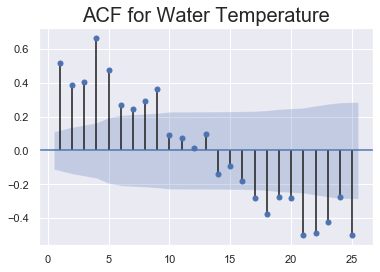

In [125]:
sgt.plot_acf(sub_water_temp.MeasureValue, zero = False) # why the lags set to 52?
plt.title("ACF for Water Temperature", size = 20)
plt.show()

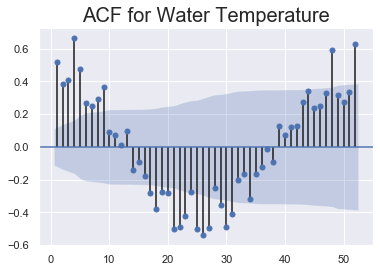

In [126]:
sgt.plot_acf(sub_water_temp.MeasureValue, zero = False, lags = 52) # why the lags set to 52?
plt.title("ACF for Water Temperature", size = 20)
plt.show()

In [55]:
import warnings
warnings.filterwarnings("ignore")

The PACF

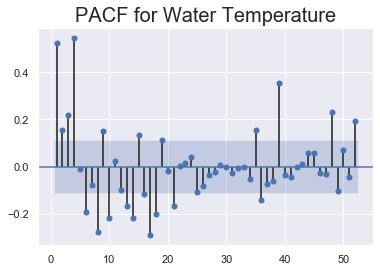

In [127]:
sgt.plot_pacf(sub_water_temp.MeasureValue, lags = 52, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Water Temperature", size = 20)
plt.show()

The AR(1) Model

In [128]:
model_ar = ARMA(sub_water_temp.MeasureValue, order=(1,0))

In [129]:
results_ar = model_ar.fit()

In [130]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(1, 0)   Log Likelihood                -990.890
Method:                       css-mle   S.D. of innovations              5.973
Date:                Fri, 04 Sep 2020   AIC                           1987.781
Time:                        17:03:01   BIC                           1998.981
Sample:                    01-09-2005   HQIC                          1992.258
                         - 12-05-2010                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.1467      0.710     21.327      0.000      13.755      16.539
ar.L1.MeasureValue     0.5232      0.049     10.755      0.000       0.428       0.619
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9113           +0.0000j            1.9113            0.0000
-----------------------------------------------------------------------------
"""

Higher-Lag AR Models

In [131]:
model_ar_2 = ARMA(sub_water_temp.MeasureValue, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary() # greater LLR than the AR(1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(2, 0)   Log Likelihood                -987.049
Method:                       css-mle   S.D. of innovations              5.899
Date:                Fri, 04 Sep 2020   AIC                           1982.098
Time:                        17:03:05   BIC                           1997.031
Sample:                    01-09-2005   HQIC                          1988.068
                         - 12-05-2010                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.1301      0.830     18.225      0.000      13.503      16.757
ar.L1.MeasureValue     0.4402      0.056      7.793      0.000       0.329       0.551
ar.L2.MeasureValue     0.1580      0.057      2.790      0.005       0.047       0.269
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4827           +0.0000j            1.4827            0.0000
AR.2           -4.2689           +0.0000j            4.2689            0.5000
-----------------------------------------------------------------------------
"""

In [132]:
model_ar_3 = ARMA(sub_water_temp.MeasureValue, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(3, 0)   Log Likelihood                -979.326
Method:                       css-mle   S.D. of innovations              5.752
Date:                Fri, 04 Sep 2020   AIC                           1968.652
Time:                        17:03:09   BIC                           1987.319
Sample:                    01-09-2005   HQIC                          1976.115
                         - 12-05-2010                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.0818      1.035     14.573      0.000      13.053      17.110
ar.L1.MeasureValue     0.4049      0.056      7.256      0.000       0.296       0.514
ar.L2.MeasureValue     0.0603      0.060      0.997      0.319      -0.058       0.179
ar.L3.MeasureValue     0.2224      0.056      3.982      0.000       0.113       0.332
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2280           -0.0000j            1.2280           -0.0000
AR.2           -0.7495           -1.7604j            1.9133           -0.3141
AR.3           -0.7495           +1.7604j            1.9133            0.3141
-----------------------------------------------------------------------------
"""

In [133]:
model_ar_4 = ARMA(sub_water_temp.MeasureValue, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(4, 0)   Log Likelihood                -924.679
Method:                       css-mle   S.D. of innovations              4.808
Date:                Fri, 04 Sep 2020   AIC                           1861.359
Time:                        17:03:12   BIC                           1883.759
Sample:                    01-09-2005   HQIC                          1870.314
                         - 12-05-2010                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7315      1.857      7.933      0.000      11.092      18.371
ar.L1.MeasureValue     0.2821      0.048      5.909      0.000       0.188       0.376
ar.L2.MeasureValue     0.0281      0.050      0.559      0.576      -0.070       0.127
ar.L3.MeasureValue     0.0013      0.050      0.026      0.979      -0.097       0.100
ar.L4.MeasureValue     0.5487      0.048     11.529      0.000       0.455       0.642
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0515           -0.0000j            1.0515           -0.0000
AR.2            0.0945           -1.1770j            1.1808           -0.2372
AR.3            0.0945           +1.1770j            1.1808            0.2372
AR.4           -1.2430           -0.0000j            1.2430           -0.5000
-----------------------------------------------------------------------------
"""

LLR Test

In [134]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Comparing Higher-Lag AR Models

In [135]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [136]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [137]:
model_ar_4 = ARMA(sub_water_temp.MeasureValue, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(4, 0)   Log Likelihood                -924.679
Method:                       css-mle   S.D. of innovations              4.808
Date:                Fri, 04 Sep 2020   AIC                           1861.359
Time:                        17:03:28   BIC                           1883.759
Sample:                    01-09-2005   HQIC                          1870.314
                         - 12-05-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7315      1.857      7.933      0.000      11.092      18.371
ar.L1.MeasureValue     0.2821      0.048      5.909      0.000       0.188       0.376
ar.L2.MeasureValue  

In [138]:
model_ar_5 = ARMA(sub_water_temp.MeasureValue, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(5, 0)   Log Likelihood                -924.664
Method:                       css-mle   S.D. of innovations              4.808
Date:                Fri, 04 Sep 2020   AIC                           1863.328
Time:                        17:03:42   BIC                           1889.462
Sample:                    01-09-2005   HQIC                          1873.777
                         - 12-05-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.7418      1.841      8.007      0.000      11.133      18.350
ar.L1.MeasureValue     0.2876      0.057      5.013      0.000       0.175       0.400
ar.L2.MeasureValue  

In [139]:
model_ar_6 = ARMA(sub_water_temp.MeasureValue, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(6, 0)   Log Likelihood                -918.800
Method:                       css-mle   S.D. of innovations              4.716
Date:                Fri, 04 Sep 2020   AIC                           1853.600
Time:                        17:03:51   BIC                           1883.466
Sample:                    01-09-2005   HQIC                          1865.540
                         - 12-05-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.8910      1.538      9.683      0.000      11.877      17.905
ar.L1.MeasureValue     0.2844      0.056      5.057      0.000       0.174       0.395
ar.L2.MeasureValue  

In [140]:
model_ar_7 = ARMA(sub_water_temp.MeasureValue, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(7, 0)   Log Likelihood                -917.825
Method:                       css-mle   S.D. of innovations              4.701
Date:                Fri, 04 Sep 2020   AIC                           1853.649
Time:                        17:03:58   BIC                           1887.249
Sample:                    01-09-2005   HQIC                          1867.083
                         - 12-05-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.9277      1.429     10.444      0.000      12.126      17.729
ar.L1.MeasureValue     0.2682      0.057      4.685      0.000       0.156       0.380
ar.L2.MeasureValue  

In [141]:
model_ar_8 = ARMA(sub_water_temp.MeasureValue, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(8, 0)   Log Likelihood                -905.524
Method:                       css-mle   S.D. of innovations              4.513
Date:                Fri, 04 Sep 2020   AIC                           1831.048
Time:                        17:04:06   BIC                           1868.381
Sample:                    01-09-2005   HQIC                          1845.974
                         - 12-05-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.0002      1.098     13.664      0.000      12.849      17.152
ar.L1.MeasureValue     0.2451      0.055      4.450      0.000       0.137       0.353
ar.L2.MeasureValue  

In [142]:
model_ar_9 = ARMA(sub_water_temp.MeasureValue, order=(9,0))
results_ar_9 = model_ar_9.fit()
print(results_ar_9.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_8, model_ar_9)))

                              ARMA Model Results                              
Dep. Variable:           MeasureValue   No. Observations:                  309
Model:                     ARMA(9, 0)   Log Likelihood                -901.968
Method:                       css-mle   S.D. of innovations              4.460
Date:                Fri, 04 Sep 2020   AIC                           1825.935
Time:                        17:04:44   BIC                           1867.002
Sample:                    01-09-2005   HQIC                          1842.354
                         - 12-05-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.9875      1.262     11.875      0.000      12.514      17.461
ar.L1.MeasureValue     0.2887      0.057      5.084      0.000       0.177       0.400
ar.L2.MeasureValue  

In [143]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_8, DF = 7)))

LLR test: 0.0


Analysing the Residuals

In [144]:
sub_water_temp['res_water_temp'] = results_ar_8.resid

In [145]:
sub_water_temp.res_water_temp.mean()

-0.015020086737156477

In [146]:
sub_water_temp.res_water_temp.var()

20.813991273919775

From the ADF test, since P-value is less than .05, we might conclude the time-series is stationary

In [148]:
result = sts.adfuller(sub_water_temp.res_water_temp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.981860
p-value: 0.001509
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572


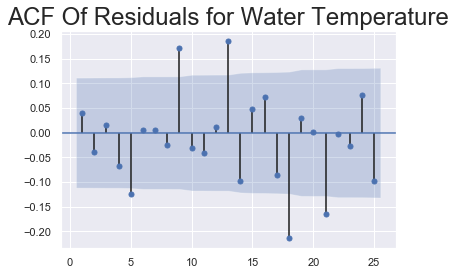

In [149]:
sgt.plot_acf(sub_water_temp.res_water_temp, zero = False)
plt.title("ACF Of Residuals for Water Temperature",size=24)
plt.show()

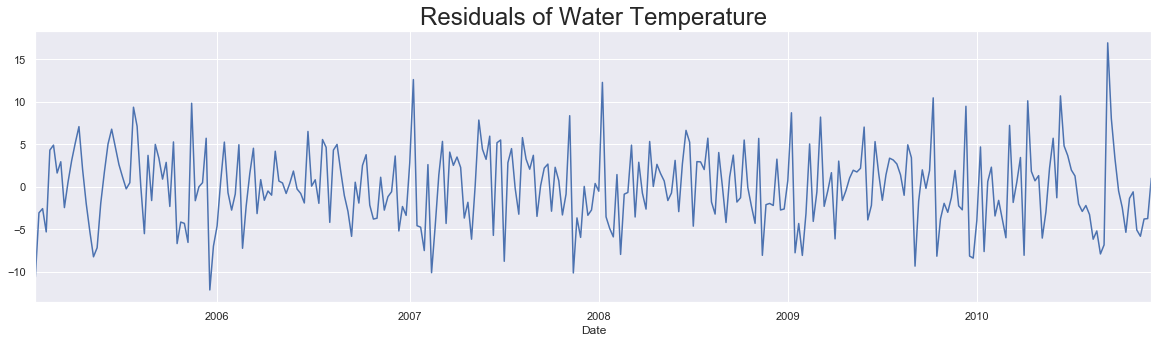

In [150]:
sub_water_temp.res_water_temp[1:].plot(figsize=(20,5))
plt.title("Residuals of Water Temperature",size=24)
plt.show()

In [151]:
# plotting geo-spatial

In [153]:
sub_water_temp.columns

Index(['MeasureValue', 'HUC12_', 'FIPS_', 'HUC12', 'res_water_temp'], dtype='object')

In [155]:
Water_temp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Agency', 'BiasPC', 'CloudCover',
       'Comments', 'Cruise', 'Database', 'FieldActivityEventType',
       'FieldActivityRemark', 'FlowStage', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Lab', 'Latitude', 'Layer', 'Longitude', 'LowerPycnocline',
       'MeasureValue', 'Method', 'ModifiedDate', 'Other Comments',
       'Other Conditions', 'Parameter', 'ParameterName_CBP',
       'ParameterName_CMC', 'PrecipType', 'PrecisionPC', 'Pressure', 'Problem',
       'Program', 'Project', 'Qualifier', 'Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId', 'SampleReplicateType', 'SampleType', 'Sea State', 'Source',
       'Station', 'StationCode', 'StationName', 'Stream Flow', 'Tidal Stage',
       'TideStage', 'TierLevel', 'Time', 'TotalDepth', 'Unit',
       'UpperPycnocline', 'Water Color', 'Water Color Description',
       'Water Odor', 'Water Odor Description', 'Water Surfaces', 'WaveHeight',
       '

In [159]:
allpoints = Water_temp['Point']
allpoints.drop_duplicates(inplace = True)
allpoints.shape

(179,)

In [160]:
allpoints['Point'] = [Point(x, y) for x, y in zip(Water_temp['Longitude'], Water_temp['Latitude'])]

In [163]:
keephuc.columns

Index(['tnmid', 'metasourceid', 'sourcedatadesc', 'sourceoriginator',
       'sourcefeatureid', 'loaddate', 'noncontributingareaacres',
       'noncontributingareasqkm', 'areasqkm', 'areaacres', 'referencegnis_ids',
       'name', 'states', 'huc12', 'hutype', 'humod', 'tohuc', 'globalid',
       'shape_Length', 'shape_Area', 'geometry'],
      dtype='object')

In [164]:
# get list of HUC12 for each point
hucs = []
names = []
for i in allpoints['Point']:
    
    huc = ""
    name = ""
    for x, y, z in zip(keephuc['name'], keephuc['huc12'], keephuc['geometry']):
            
        if z.contains(i) == True:
            name = x
            huc = y
            break
        else:
            pass
            
    hucs.append(huc)
    names.append(name)
    
allpoints['HUC12'] = hucs
allpoints['HUCNAME'] = names

In [165]:
keep_counties.columns

Index(['fips', 'name', 'state'], dtype='object')

In [ ]:
# get list of HUC12 for each point
fips = []
states = []
counties = []
for i in allpoints['Point']:
    
    fip = ""
    state = ""
    county = ""
    for w, x, y, z in zip(keep_counties['fips'], keep_counties['state'], keep_counties['NAMELSAD'], keep_counties['geometry']):
            
        if z.contains(i) == True:
            fip = w
            state = x
            county = y
            break
        else:
            pass
            
    fips.append(fip)
    states.append(state)
    counties.append(county)
    
allpoints['FIPS'] = fips
allpoints['STATE'] = states
allpoints['COUNTY'] = counties

In [167]:
from shapely import wkt
import pandas as pd

In [185]:
keep_counties.shape

(346, 3)

In [186]:
allpoints.head()

Date
2009-07-22    POINT (-75.13245000000001 38.44902)
2005-10-08             POINT (-75.28622 38.14825)
2006-06-14             POINT (-75.40639 42.37778)
2006-03-07             POINT (-75.80333 42.03528)
2006-06-29              POINT (-76.4006 42.03389)
Name: Point, dtype: object

In [188]:
keep_counties.head()

,fips,name,state
325,10001,Kent County,DE
326,10003,New Castle County,DE
327,10005,Sussex County,DE
329,11001,District of Columbia,DC
1215,24001,Allegany County,MD


In [190]:
Water_temp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Agency', 'BiasPC', 'CloudCover',
       'Comments', 'Cruise', 'Database', 'FieldActivityEventType',
       'FieldActivityRemark', 'FlowStage', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Lab', 'Latitude', 'Layer', 'Longitude', 'LowerPycnocline',
       'MeasureValue', 'Method', 'ModifiedDate', 'Other Comments',
       'Other Conditions', 'Parameter', 'ParameterName_CBP',
       'ParameterName_CMC', 'PrecipType', 'PrecisionPC', 'Pressure', 'Problem',
       'Program', 'Project', 'Qualifier', 'Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId', 'SampleReplicateType', 'SampleType', 'Sea State', 'Source',
       'Station', 'StationCode', 'StationName', 'Stream Flow', 'Tidal Stage',
       'TideStage', 'TierLevel', 'Time', 'TotalDepth', 'Unit',
       'UpperPycnocline', 'Water Color', 'Water Color Description',
       'Water Odor', 'Water Odor Description', 'Water Surfaces', 'WaveHeight',
       '

In [193]:
from shapely.geometry import Point
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [215]:
gdf = geopandas.GeoDataFrame(
    Water_temp, geometry=geopandas.points_from_xy(Water_temp.Longitude, Water_temp.Latitude))

In [216]:
gdf.head()

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,FieldActivityRemark,...,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,geometry
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-22,264272,29,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY509,CBP,NaN,NaN,...,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,POINT (-75.13245 38.44902)
2010-06-22,264279,50,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY531,CBP,NaN,NaN,...,S,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,POINT (-75.13245 38.44902)
2010-07-07,264286,70,MDDNR,NaN,Clear (0-10%),NaN,BAY532,CBP,NaN,NaN,...,E,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,POINT (-75.13245 38.44902)
2008-12-11,264298,101,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY492,CBP,NaN,NaN,...,N,0 To 1 Knot,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,POINT (-75.13245 38.44902)
2009-10-15,264310,131,MDDNR,NaN,Overcast (>90%),NaN,BAY514,CBP,NaN,NaN,...,SE,>1 To 10 Knots,NaN,POINT (-75.13245000000001 38.44902),20403030303,Assawoman Bay,24047,Worcester County,MD,POINT (-75.13245 38.44902)


In [246]:
gdf['MeasureValue']

Date
2009-07-22    29.10
2010-06-22    32.00
2010-07-07    33.60
2008-12-11    13.60
2009-10-15    15.20
              ...  
2007-09-02     1.57
2007-07-09    27.21
2007-12-11    13.66
2009-02-26     6.56
2007-08-31    27.11
Name: MeasureValue, Length: 1196, dtype: float64

In [206]:
keep_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 325 to 3097
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fips    346 non-null    int64 
 1   name    346 non-null    object
 2   state   346 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.8+ KB


In [220]:
test = gpd.GeoDataFrame(Water_temp['STATE_'], crs=crs, geometry=geometry)

In [221]:
test

,STATE_,geometry
Date,,
2009-07-22,MD,None
2010-06-22,MD,None
2010-07-07,MD,None
2008-12-11,MD,None
2009-10-15,MD,None
...,...,...
2007-09-02,VA,None
2007-07-09,VA,None
2007-12-11,VA,None


In [283]:
import mapclassify as mc
scheme = mc.EqualInterval(gdf['MeasureValue'], k=10)

In [284]:
scheme

EqualInterval         

   Interval      Count
----------------------
[-0.20,  3.18] |   120
( 3.18,  6.56] |   126
( 6.56,  9.94] |   154
( 9.94, 13.32] |   104
(13.32, 16.70] |   142
(16.70, 20.08] |   138
(20.08, 23.46] |   123
(23.46, 26.84] |   165
(26.84, 30.22] |   112
(30.22, 33.60] |    12

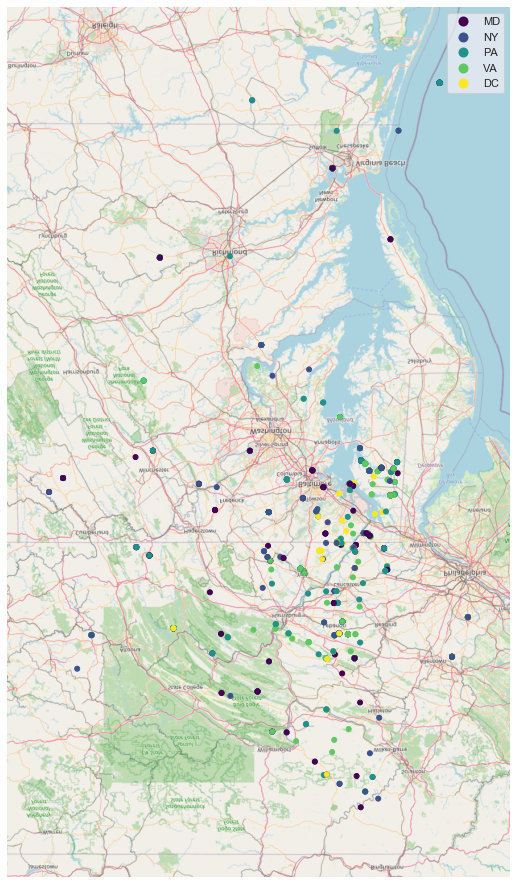

In [251]:
import mapclassify as mc
#scheme = mc.EqualInterval(gdf['STATE_'], k=5)
geometry = gdf['geometry']
crs = {'init' :'epsg:2283'}
#gdf_2 = gpd.GeoDataFrame(keep_counties['state'], crs=crs, geometry=geometry)
ax = gplt.webmap(gdf, figsize = (16, 16), projection=gcrs.WebMercator())
#gplt.pointplot(gdf['STATE_'], hue= 'STATE_', ax=ax, scheme = gdf['STATE_'].nunique(), legend_labels = list(gdf['STATE_'].unique()), legend = 'True')

gplt.pointplot(gdf, hue= 'MeasureValue', ax=ax, cmap='viridis', scheme=scheme, legend_labels = list(gdf['STATE_'].unique()), legend = 'True')

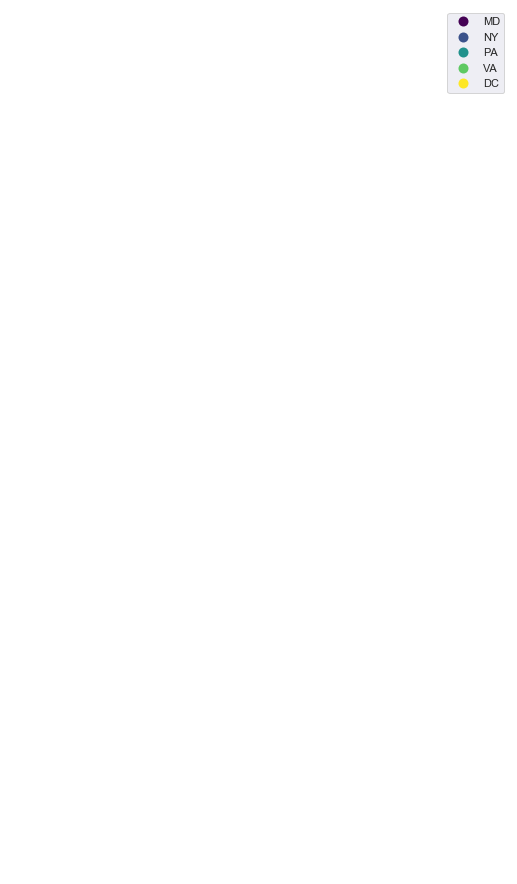

In [258]:
import mapclassify as mc
#scheme = mc.EqualInterval(gdf['STATE_'], k=5)
geometry = gdf['geometry']
crs = {'init' :'epsg:2283'}
#gdf_2 = gpd.GeoDataFrame(keep_counties['state'], crs=crs, geometry=geometry)
ax = geoplot.kdeplot(gdf, figsize = (16, 16), clip=geometry,
    shade=True, cmap='Reds', projection=gcrs.WebMercator())
#gplt.pointplot(gdf['STATE_'], hue= 'STATE_', ax=ax, scheme = gdf['STATE_'].nunique(), legend_labels = list(gdf['STATE_'].unique()), legend = 'True')

gplt.pointplot(gdf, hue= 'MeasureValue', ax=ax, cmap='viridis', scheme=scheme, legend_labels = list(gdf['STATE_'].unique()), legend = 'True')

In [ ]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

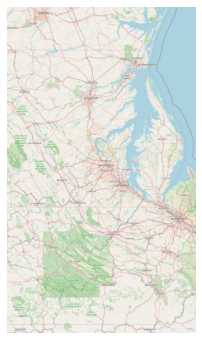

In [260]:
ax = gplt.webmap(gdf, projection=gcrs.WebMercator())

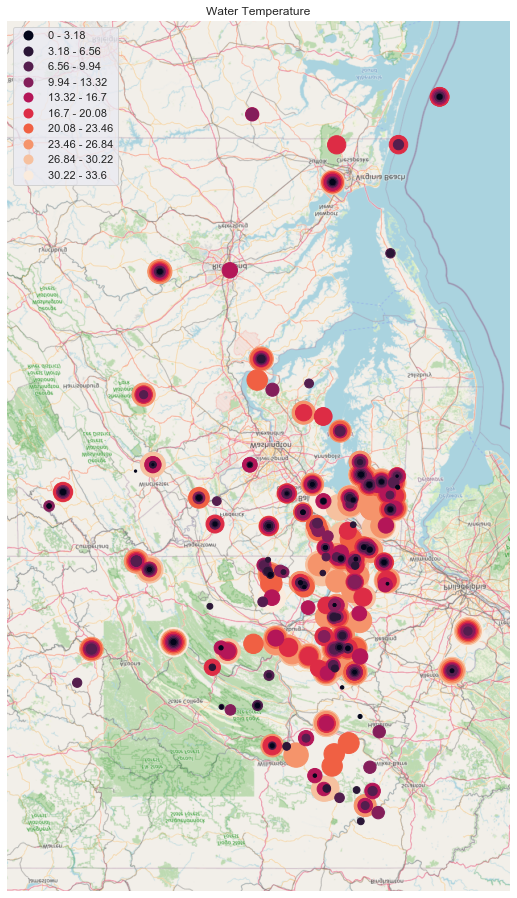

In [300]:
import geoplot.crs as gcrs
ax = gplt.webmap(gdf, figsize = (16, 16), clip=geometry,
    shade=True, cmap='Reds', projection=gcrs.WebMercator())
gplt.pointplot(
    gdf,
    scale='MeasureValue', limits=(2, 30), projection=gcrs.AlbersEqualArea(),
    hue='MeasureValue',
    legend=True,
    scheme=scheme,
#    legend_var='scale',
#    legend_kwargs={'bbox_to_anchor': (1, 0.35), 'frameon': False},
#    legend_values=[0, 5, 10, 15, 20, 25, 30],
#    legend_labels=['0 Degree Celsius', '5 Degree Celsius', '10 Degree Celsius', '15 Degree Celsius', '20 Degree Celsius', \
#                  '25 Degree Celsius','30 Degree Celsius'],
    ax=ax
)
plt.title("Water Temperature")
plt.savefig('Water Temperature Heatmap.png')

In [301]:
pwd

'E:\\Hackathon_HackTheBay\\Water Quality Data'

Text(0.5, 1.0, 'Water Temperature')

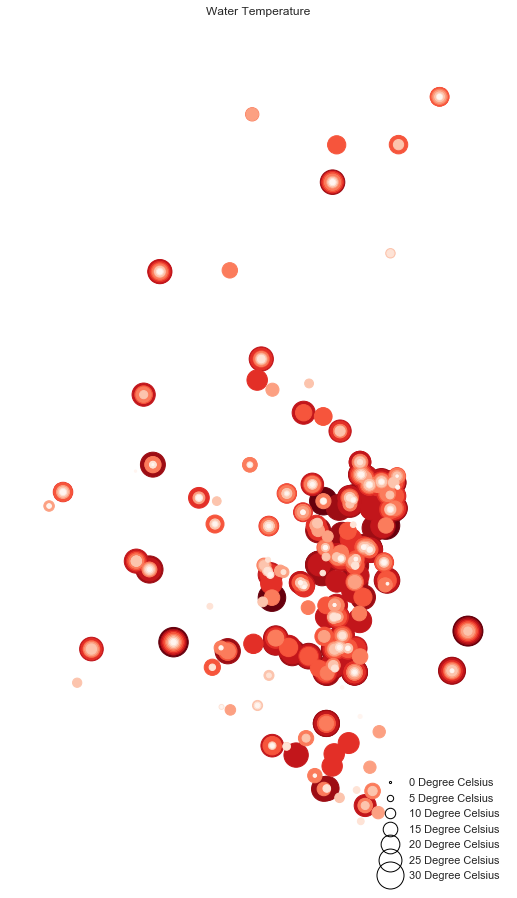

In [296]:
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

scheme = mc.EqualInterval(gdf['MeasureValue'], k=10)
proj = gcrs.WebMercator()

ax = gplt.polyplot(
    gdf,
    zorder=-1,
    linewidth=1,
    projection=proj,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(16, 16)
)

gplt.pointplot(
    gdf,
    scale='MeasureValue',
    limits=(2, 30),
    hue='MeasureValue',
    cmap='Reds',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[0, 5, 10, 15, 20, 25, 30],
    legend_labels=['0 Degree Celsius', '5 Degree Celsius', '10 Degree Celsius', '15 Degree Celsius', '20 Degree Celsius', \
                  '25 Degree Celsius','30 Degree Celsius'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

plt.title("Water Temperature")